In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

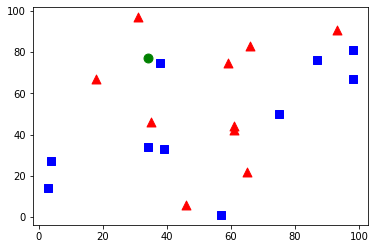

In [10]:
# Generate 20 known data points
trainData = np.random.randint(0,100,(20,2)).astype(np.float32)

# Labels each data point
labels = np.random.randint(0,2,(20,1)).astype(np.float32)

# When label = 0 show as red traingle
red = trainData[labels.ravel()==0]
plt.scatter(red[:,0], red[:,1],80,'r','^')

# When label = 1 show as red traingle
blue = trainData[labels.ravel()==1]
plt.scatter(blue[:,0], blue[:,1],80,'b','s')


# Test Point
test = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(test[:,0],test[:,1],80,'g','o')
plt.show()


In [15]:
# Implement K-NN

knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, labels)
res, results, neighbours, dist = knn.findNearest(test,7)

print('result', results)
print('neighbours', neighbours)
print('distance', dist)

result [[0.]]
neighbours [[1. 0. 0. 0. 0. 0. 0.]]
distance [[  20.  356.  409.  629.  962. 1060. 1818.]]


# Image Classification using k-NN

In [21]:
# Import the images
img1 = cv2.imread('images/apple1.jpg',0)
img2 = cv2.imread('images/apple2.jpg',0)
img3 = cv2.imread('images/apple3.jpg',0)

img4 = cv2.imread('images/banana1.jpg',0)
img5 = cv2.imread('images/banana2.jpg',0)
img6 = cv2.imread('images/banana3.jpg',0)

test = cv2.imread('images/apple4.jpg',0)

In [22]:
# Combine the images into one array
train = np.concatenate((img1, img2, img3, img4, img5, img6), axis=0)

# Prepare train and test datasets
train = train.reshape(-1,10000).astype(np.float32)
test = test.reshape(-1,10000).astype(np.float32)

In [23]:
train.shape

(6, 10000)

In [24]:
# Create labels for train and test data. Apple = 0 , Banana = 1.
train_labels = np.array([[0],[0],[0],[1],[1],[1]]).astype(np.float32)

In [27]:
# Initiate kNN, train the data, then test it with test data for k=1
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=2)

In [28]:
# Print out result of classification
if result == 0:
    print('I guess this is an apple!')
elif result == 1:
    print('I guess this is a banana!')     

I guess this is an apple!


In [31]:
# Import the image
img = cv2.imread('images/digits.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Show the image to visualize
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Make it into a Numpy array. It size will be (50,100,20,20)
x = np.array(cells)

# Now we prepare train_data and test_data.
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

In [33]:
# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

In [34]:
# Initiate kNN, train the data, then test it with test data for k=1
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=1)

In [35]:
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print( accuracy )

92.0
